<a href="https://colab.research.google.com/github/erneyurrego-art/Introducci-n-a-la-IA/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis exploratorio inicial del dataset

Importaciones necesarias para el analisis exploratorio.

In [ ]:
import pandas as pd # Manejo del dataframe
import matplotlib.pyplot as plt # Visualización de los datos
import seaborn as sns # visualización de los datos

Cargar los datos del archivo de train.csv y visualizar el DataFrame

In [4]:
data = pd.read_csv("train.csv") # cargar el archivo de entrenamiento

print("Tamaño del dataframe", data.shape)
data.head() # primeros 5 elementos del dataframe para tener un vistaso general del dataset

Tamaño del dataframe (151596, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


En esta primera parte se puede eliminar la columna id, ya que no aporta información y, además, en la visualización de los graficos puede generar ruido.

In [5]:
data = data.drop("ID", axis=1)

In [6]:
# comprobar si se puede acceder al dataframe

print(data["E_PRGM_ACADEMICO"].nunique()) # programas academicos diferentes
print(data["E_PRGM_ACADEMICO"].value_counts().idxmax())
print(data["E_PRGM_ACADEMICO"].value_counts().idxmin())

894
DERECHO
ADMINISTRACION DE HOTELERIA Y TURISMO


### Inicio de la exploración de los datos

Información sobre las columnas del dataset

Se puede observar que más de la mitad de las columnas son variables cualitativas. Por ello, debemos transformarlas en variables cuantitativas o eliminarlas si no proporcionan información relevante. De esta manera, podremos ir limpiando el dataset para el modelo de machine learning. Sin embargo, este proceso se realizará en la segunda parte del proyecto.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151596 entries, 0 to 151595
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PERIODO_ACADEMICO            151596 non-null  int64  
 1   E_PRGM_ACADEMICO             151596 non-null  object 
 2   E_PRGM_DEPARTAMENTO          151596 non-null  object 
 3   E_VALORMATRICULAUNIVERSIDAD  150226 non-null  object 
 4   E_HORASSEMANATRABAJA         144772 non-null  object 
 5   F_ESTRATOVIVIENDA            144536 non-null  object 
 6   F_TIENEINTERNET              145739 non-null  object 
 7   F_EDUCACIONPADRE             146450 non-null  object 
 8   F_TIENELAVADORA              142887 non-null  object 
 9   F_TIENEAUTOMOVIL             142022 non-null  object 
 10  E_PRIVADO_LIBERTAD           151595 non-null  object 
 11  E_PAGOMATRICULAPROPIO        150180 non-null  object 
 12  F_TIENECOMPUTADOR            143215 non-null  object 
 13 

In [8]:
print("Revisión variables cuantitativas")
print(data.describe())

print("Revisión varibles cualitativas")
print(data.describe(include="object"))

Revisión variables cuantitativas
       PERIODO_ACADEMICO    INDICADOR_1    INDICADOR_2    INDICADOR_3  \
count      151596.000000  151595.000000  151595.000000  151595.000000   
mean        20198.360214       0.268946       0.259647       0.262113   
std            10.521386       0.122231       0.093292       0.058944   
min         20183.000000       0.000000       0.000000       0.000000   
25%         20195.000000       0.204000       0.212000       0.255000   
50%         20195.000000       0.240000       0.271000       0.276000   
75%         20203.000000       0.314000       0.308000       0.293000   
max         20213.000000       0.657000       0.487000       0.320000   

         INDICADOR_4  
count  151595.000000  
mean        0.262772  
std         0.068055  
min         0.000000  
25%         0.255000  
50%         0.285000  
75%         0.302000  
max         0.332000  
Revisión varibles cualitativas
       E_PRGM_ACADEMICO E_PRGM_DEPARTAMENTO  \
count            151596 

Identificar cuántos valores nulos tienen las diferentes columnas, para luego tomar decisiones como rellenarlos en función de los demás datos o, simplemente, eliminar aquellas columnas con demasiados valores nulos.

In [9]:
datos_null = data.isnull().sum()
datos_not_null = data.notnull().sum()
datos_duplicados = data.duplicated().sum()

print("Valores nulos por columna")
print(datos_null)
print("------------------------------")
print("Valores no nulos por columna")
print(datos_not_null)
print("------------------------------")
print("Valores duplicados del data")
print(datos_duplicados)

Valores nulos por columna
PERIODO_ACADEMICO                 0
E_PRGM_ACADEMICO                  0
E_PRGM_DEPARTAMENTO               0
E_VALORMATRICULAUNIVERSIDAD    1370
E_HORASSEMANATRABAJA           6824
F_ESTRATOVIVIENDA              7060
F_TIENEINTERNET                5857
F_EDUCACIONPADRE               5146
F_TIENELAVADORA                8709
F_TIENEAUTOMOVIL               9574
E_PRIVADO_LIBERTAD                1
E_PAGOMATRICULAPROPIO          1416
F_TIENECOMPUTADOR              8381
F_TIENEINTERNET.1              5858
F_EDUCACIONMADRE               5262
RENDIMIENTO_GLOBAL                1
INDICADOR_1                       1
INDICADOR_2                       1
INDICADOR_3                       1
INDICADOR_4                       1
dtype: int64
------------------------------
Valores no nulos por columna
PERIODO_ACADEMICO              151596
E_PRGM_ACADEMICO               151596
E_PRGM_DEPARTAMENTO            151596
E_VALORMATRICULAUNIVERSIDAD    150226
E_HORASSEMANATRABAJA         

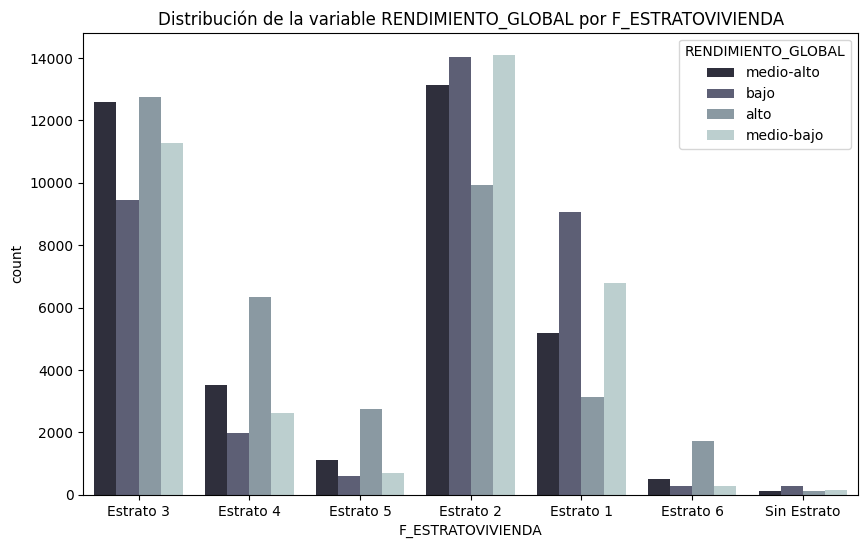

In [10]:
# Este primer grafico distribuye la variable objectivo por el
# estrado de la vivienda

plt.figure(figsize=(10, 6))
sns.countplot(x ="F_ESTRATOVIVIENDA", hue="RENDIMIENTO_GLOBAL", data=data, palette="bone")
plt.title("Distribución de la variable RENDIMIENTO_GLOBAL por F_ESTRATOVIVIENDA")
plt.show()

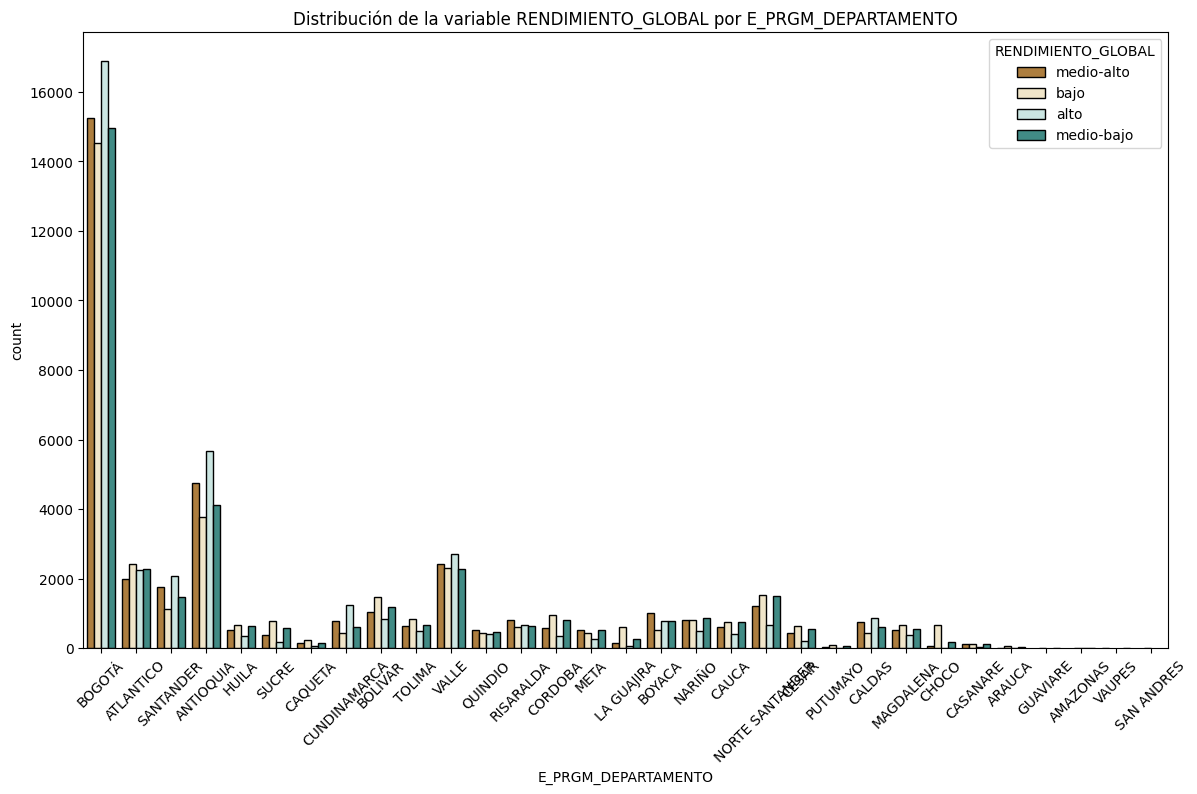

In [11]:
# como se esta distribuyendo el RENDIMIENTO_GLOBAL por la localidad o de partamento
# en el cual pertenece el estudiante

plt.figure(figsize=(14, 8))
sns.countplot(x = "E_PRGM_DEPARTAMENTO", hue="RENDIMIENTO_GLOBAL", data = data, palette = "BrBG", edgecolor="black")
plt.title("Distribución de la variable RENDIMIENTO_GLOBAL por E_PRGM_DEPARTAMENTO")
plt.xticks(rotation=45)
plt.show()

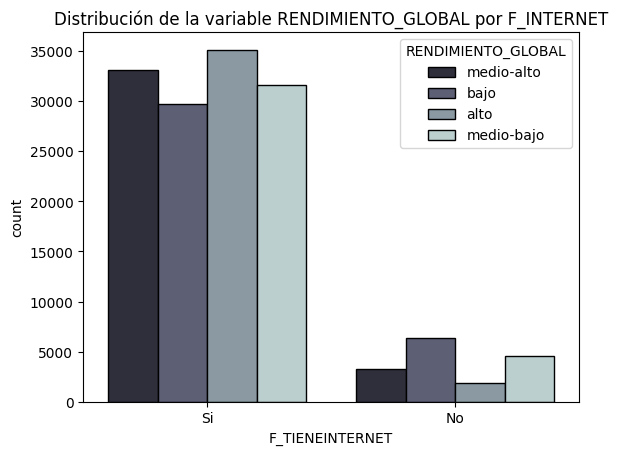

In [12]:
# número de estudiantes que tienen el acceso a internet y su distribución
# con la variable objectivo

sns.countplot(x="F_TIENEINTERNET", hue="RENDIMIENTO_GLOBAL", data=data, palette="bone", edgecolor="black")
plt.title("Distribución de la variable RENDIMIENTO_GLOBAL por F_INTERNET")
plt.show()



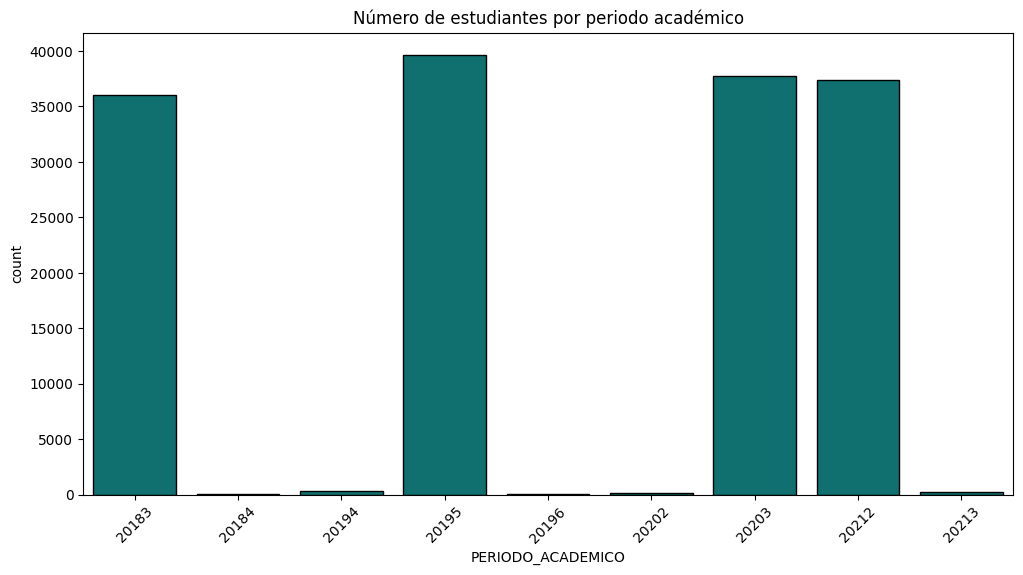

In [13]:
# El número total de estudiantes y su distribución con el periodo academico
#

plt.figure(figsize=(12,6))
sns.countplot(x="PERIODO_ACADEMICO", data=data, color="teal", edgecolor="black")
plt.title("Número de estudiantes por periodo académico")
plt.xticks(rotation=45)
plt.show()


Ahora se mostrarán una serie de histogramas de las variables cuantitativas del dataset, con el objectivo de observar qué tipos de distribuciones tienen, así como sesgos o valores atípicos.

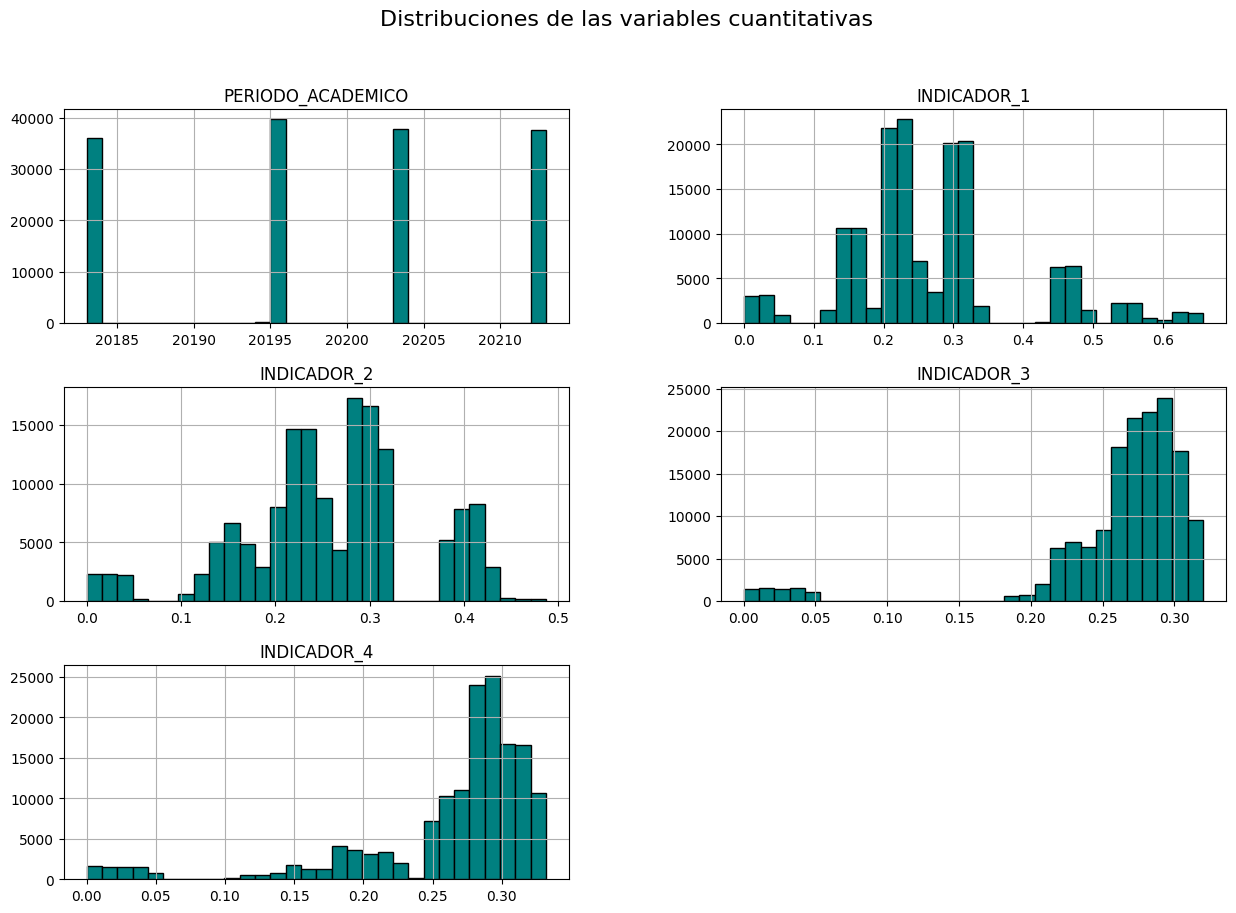

In [14]:
data.hist(bins=30, figsize=(15, 10), color="teal", edgecolor="black")
plt.suptitle("Distribuciones de las variables cuantitativas", fontsize=16)
plt.show()

Con los siguientes boxplots buscamos identificar los valores atípicos dentro de las variables cuantitativas. De igual forma, esto también nos ayudará a tomar decisiones sobre la normalización de los datos de dichas variables, en caso de que lo requieran.

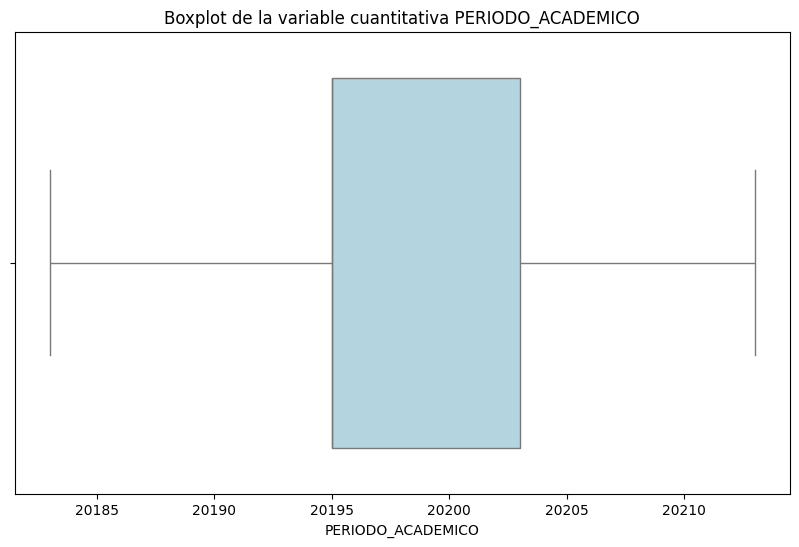

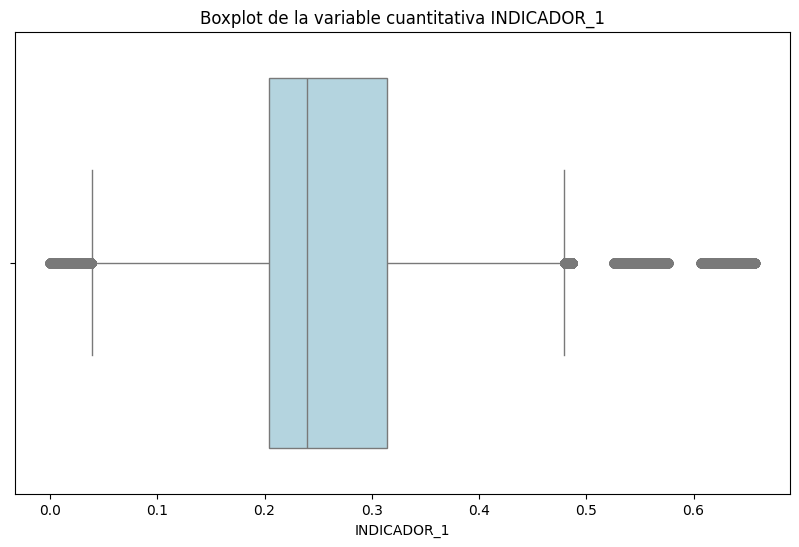

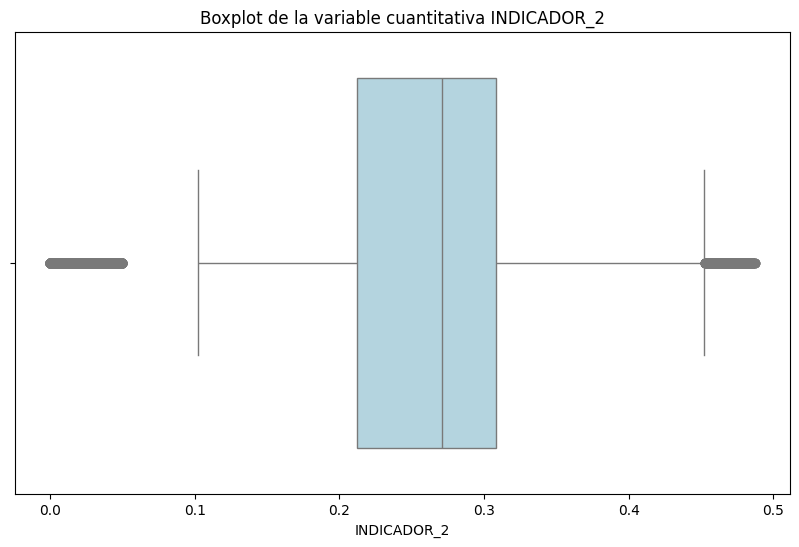

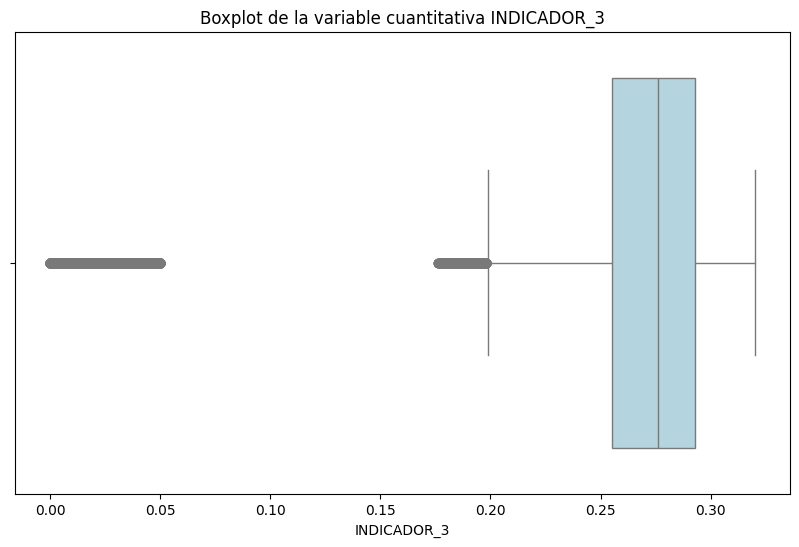

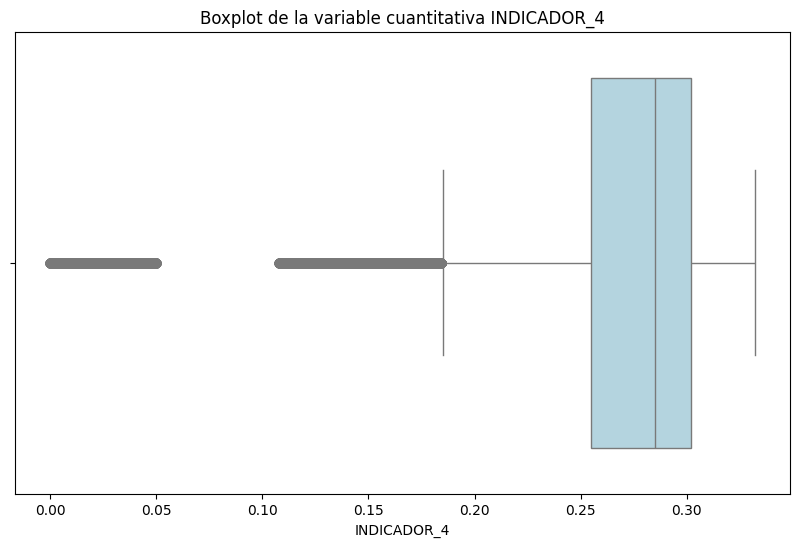

In [15]:
for col in data.select_dtypes(include=["int64", "float64"]).columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=data[col], color="lightblue")
  plt.title(f"Boxplot de la variable cuantitativa {col}")
  plt.show()

Ahora vamos a realizar una visualización de las variables categóricas para analizar su comportamiento. Es importante dejar claro que estas variables deben transformarse en valores cuantitativos o, en su defecto, eliminarse si no aportan información relevante para el modelo de machine learning y el objetivo del proyecto.

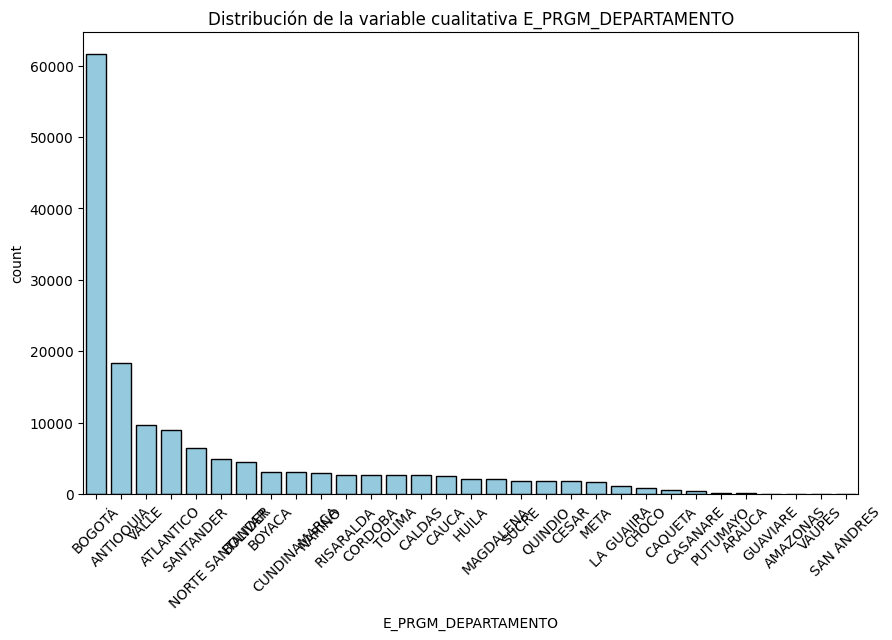

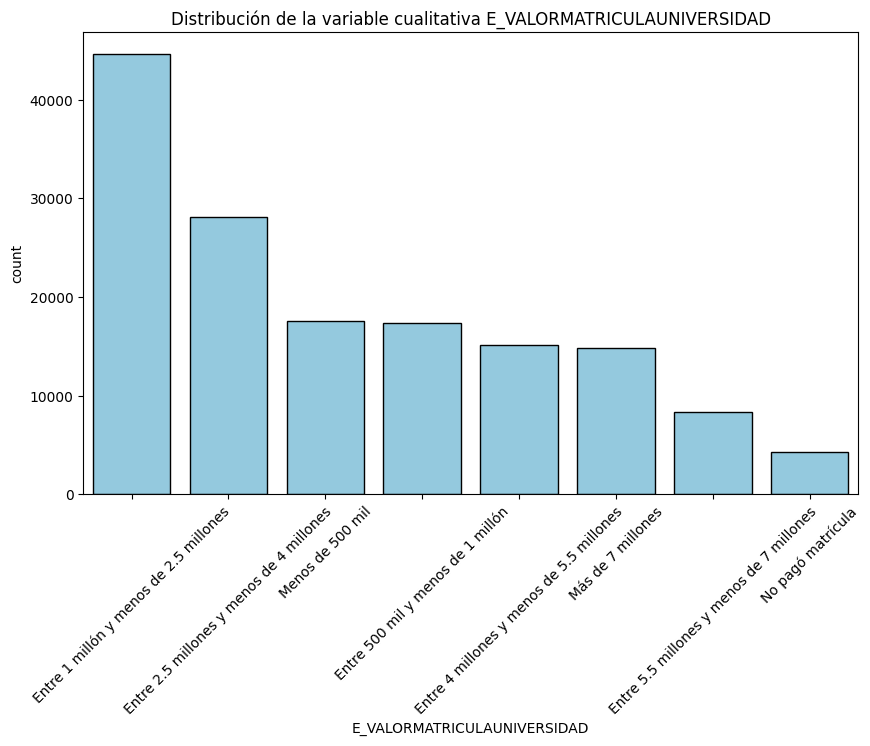

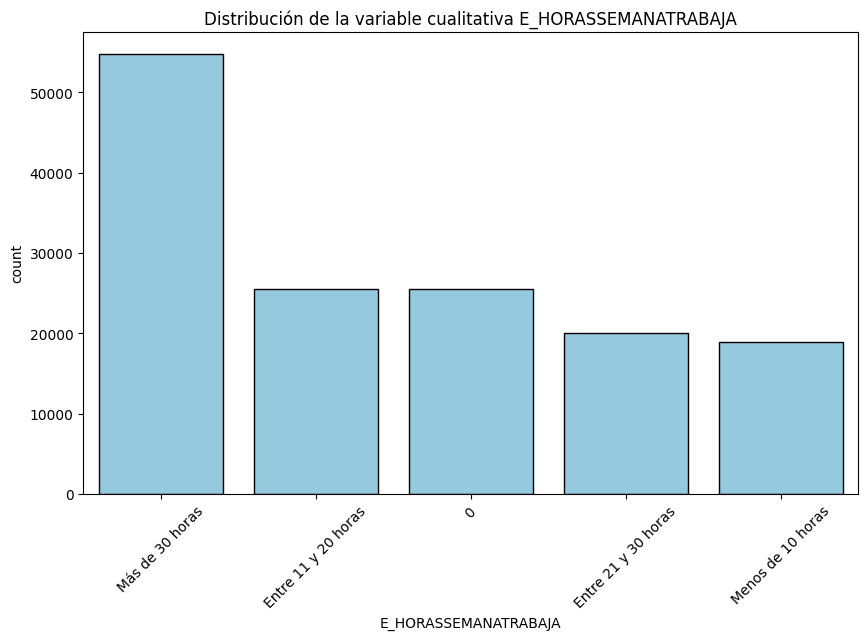

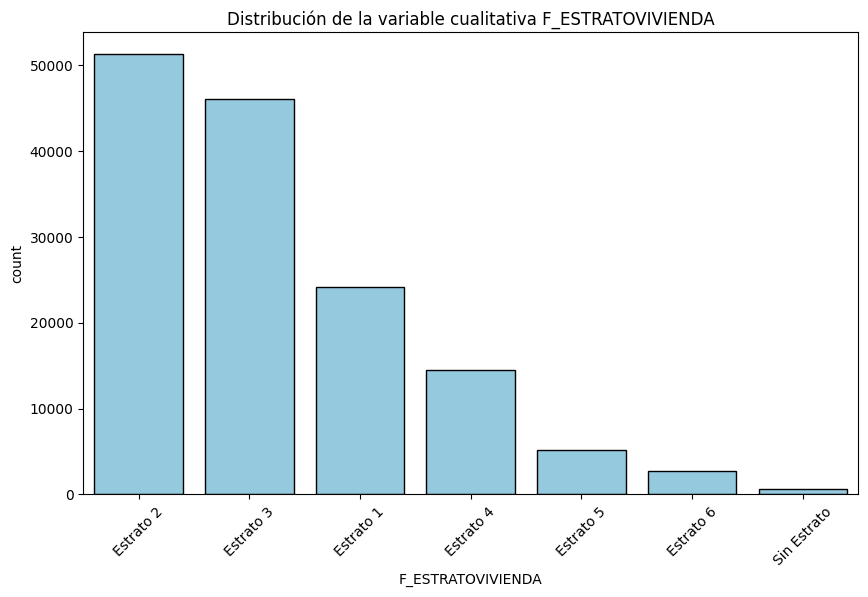

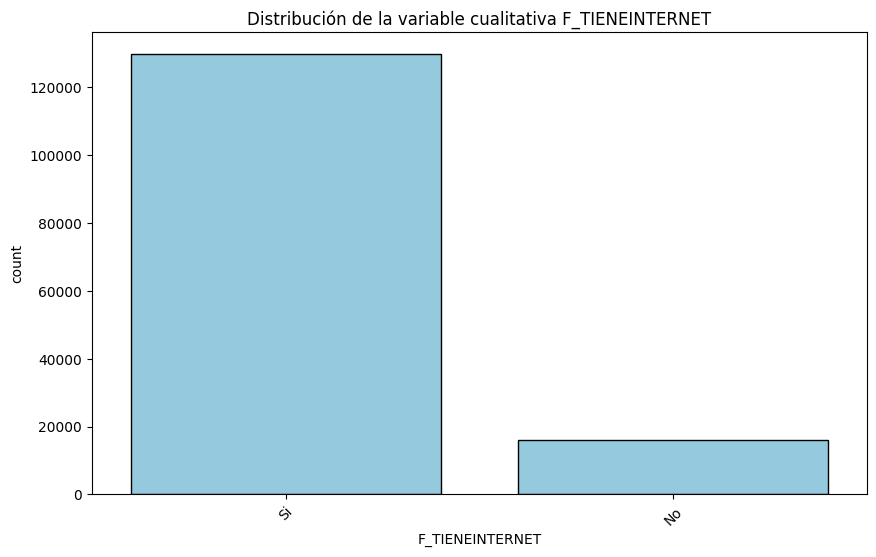

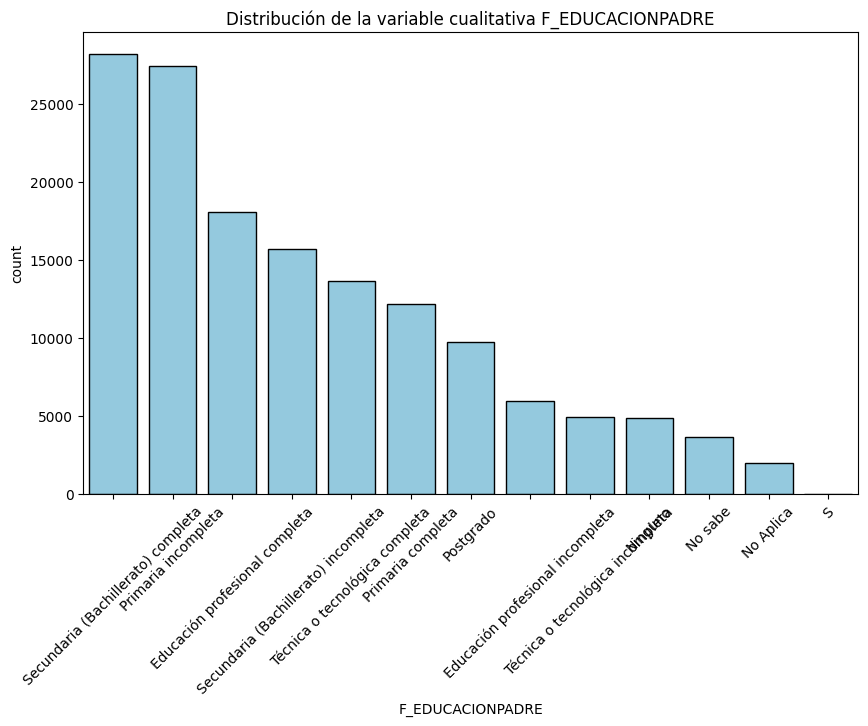

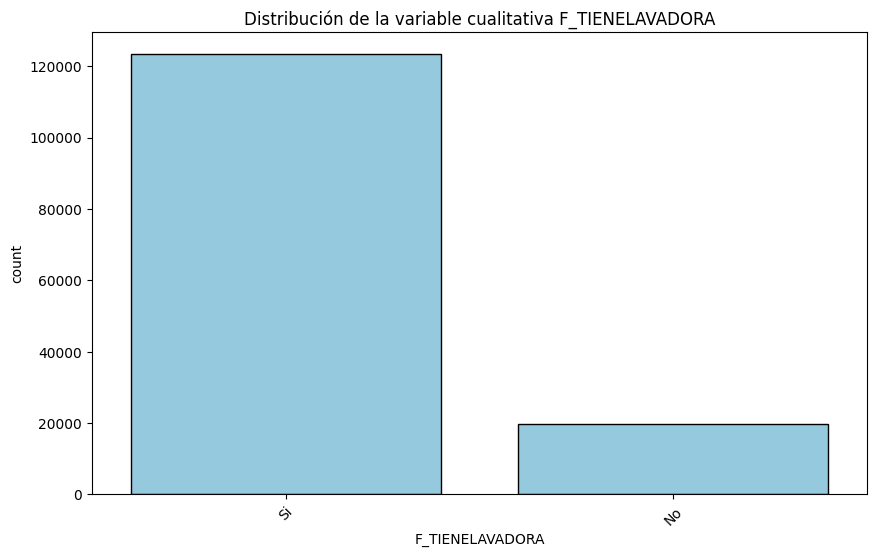

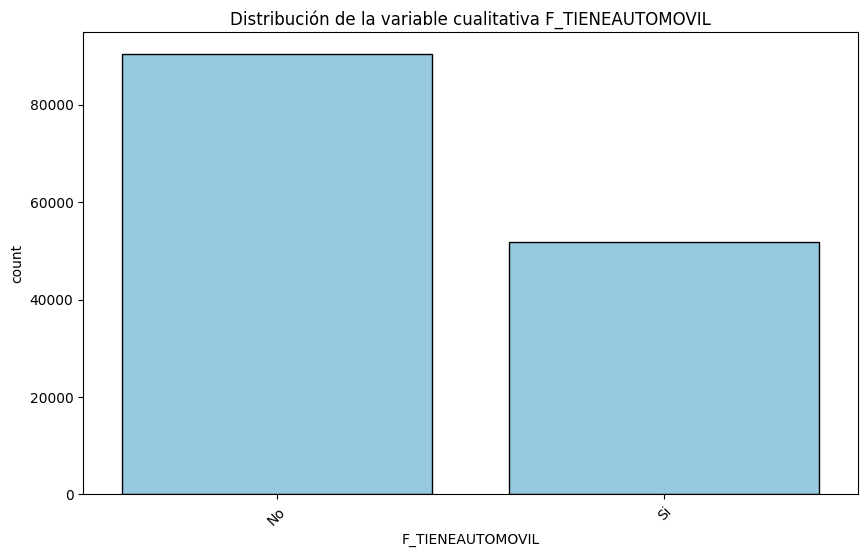

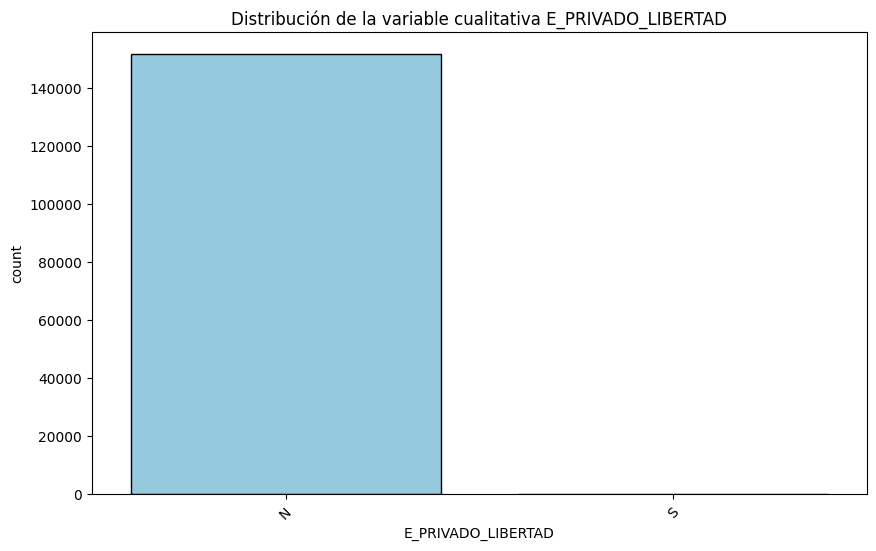

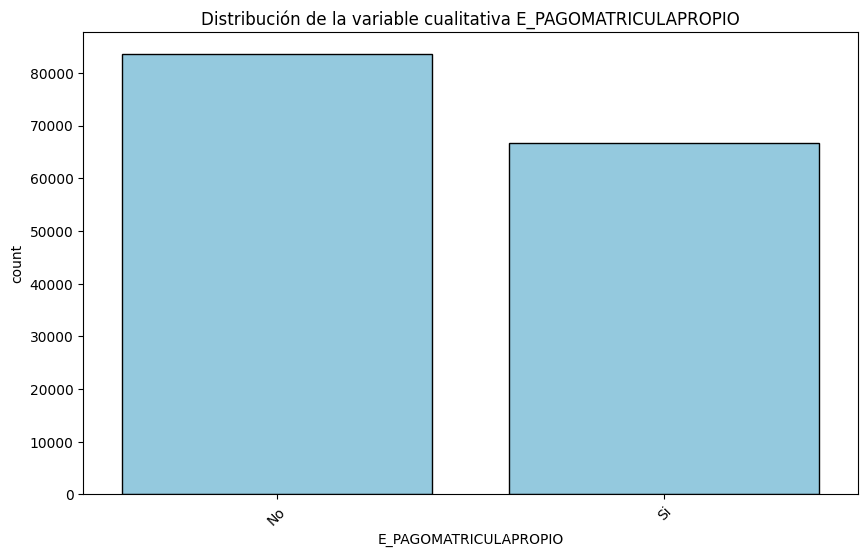

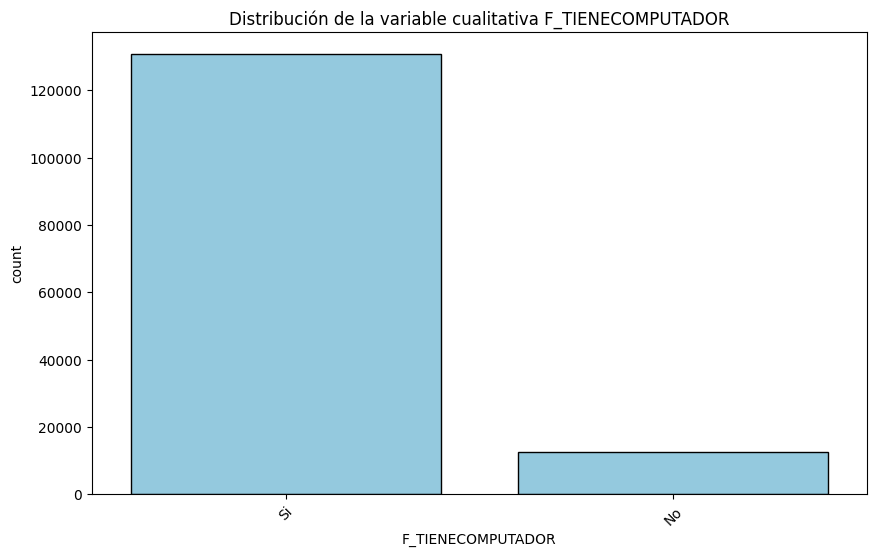

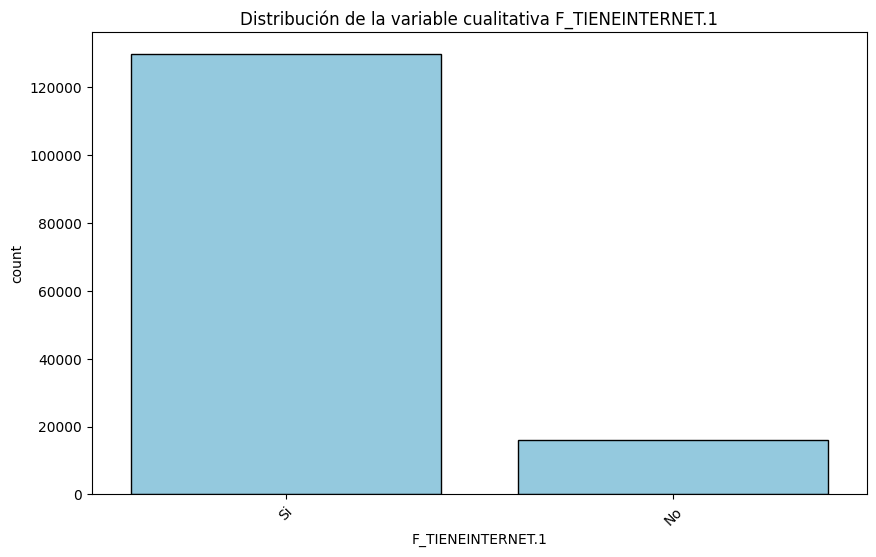

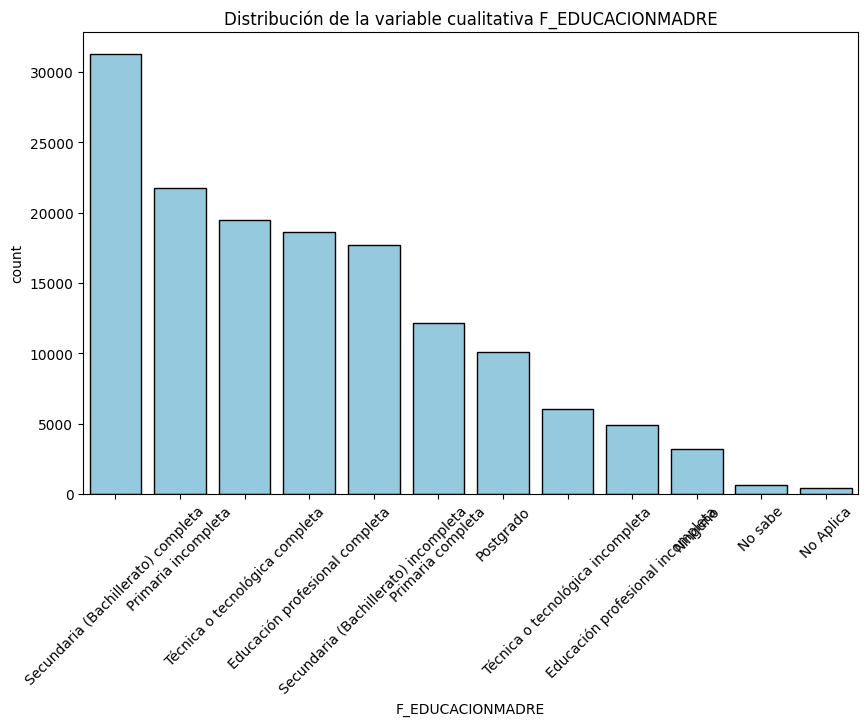

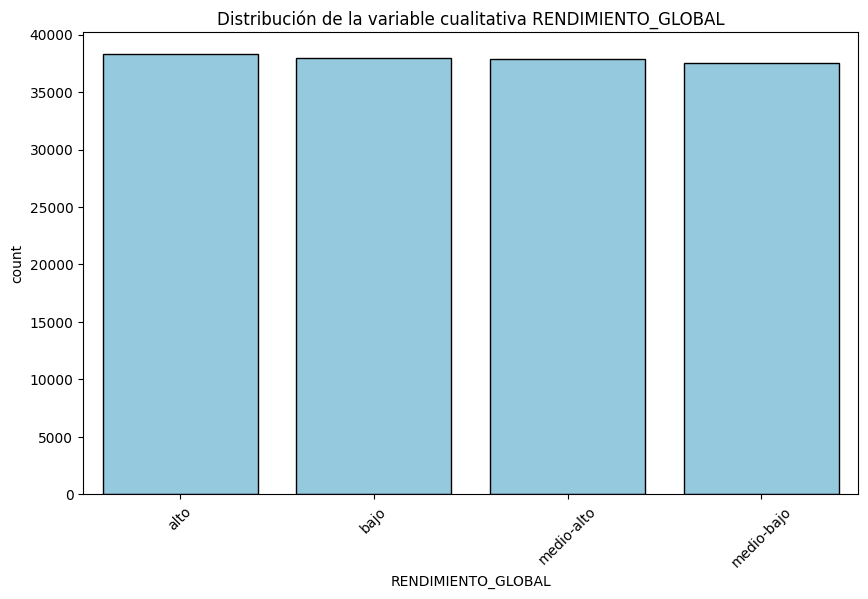

In [19]:
for i, col in enumerate(data.select_dtypes(include=["object"]).columns):

  if i == 0:
    continue # la distribución de E_PRGM_ACADEMICO es muy poco entendible

  plt.figure(figsize=(10, 6))
  sns.countplot(data=data, x=col, order=data[col].value_counts().index, color="skyblue", edgecolor="black")
  plt.title(f"Distribución de la variable cualitativa {col}")
  plt.xticks(rotation=45)
  plt.show()

Ahora vamos a revisar la correlación entre las variables cuantitativas. Aunque puede que no nos proporcione mucha información debido a la poca cantidad de variables disponibles, sin embargo es posible que se encuentre una posible correlación entre los indicadores.

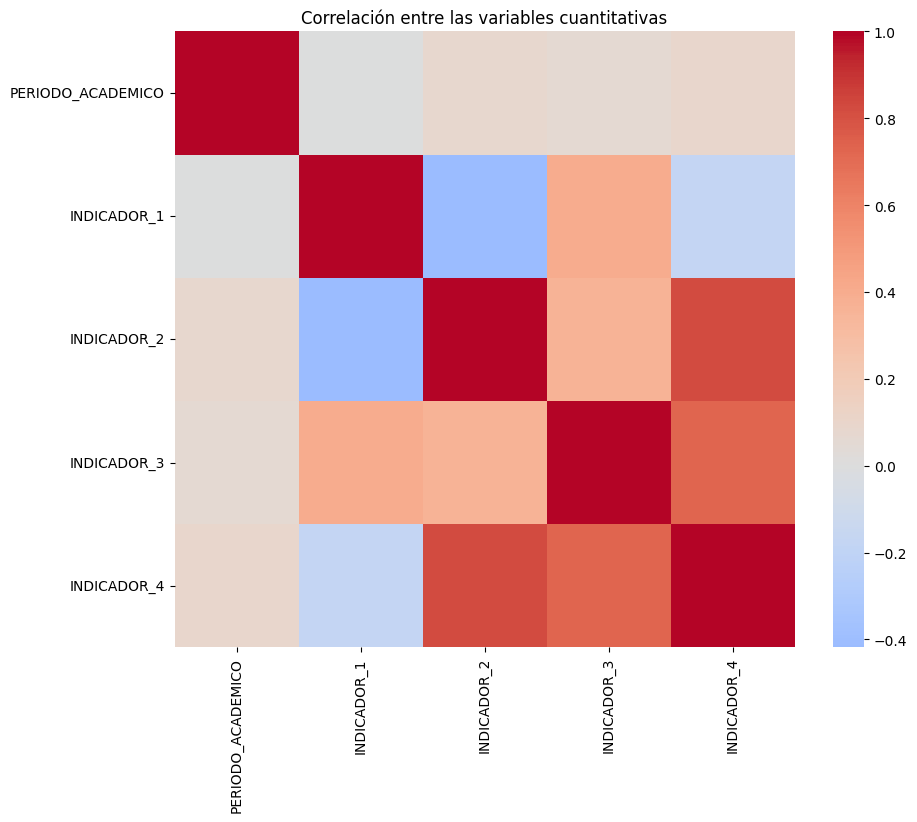

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlación entre las variables cuantitativas")
plt.show()

Finalmente, veremos la distribución de la variable objetivo. En este caso, se trata de una variable categorica, haciendo que el modelo que se desarrollara sea de clasificación.

/tmp/ipython-input-3234752740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RENDIMIENTO_GLOBAL", data=data, palette="bone", edgecolor="black")


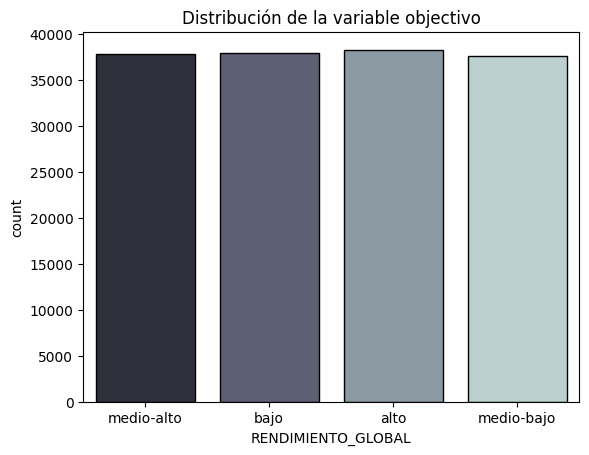

RENDIMIENTO_GLOBAL
alto          25.246215
bajo          25.037765
medio-alto    24.953989
medio-bajo    24.762030
Name: proportion, dtype: float64


In [18]:
# el grafico muestra una distribución balanceada y es bueno por que evitamos de tener
# sesgo hacia una categoria


sns.countplot(x="RENDIMIENTO_GLOBAL", data=data, palette="bone", edgecolor="black")
plt.title("Distribución de la variable objectivo")
plt.show()

print(data["RENDIMIENTO_GLOBAL"].value_counts(normalize=True) * 100)